In [ ]:
#Mains
import numpy as np
import pandas as pd
import re
import string
import os
from google.colab import drive

#Models
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

#Sklearn Helpers
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import  chi2

#For plots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
# set environment as googledrive to folder "resource"
data_path =  "/IdeologyDetect/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/IdeologyDetect/dataset/mixed/"

except:
    print("You are not working in Colab at the moment :(")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path+"/mixed_dataset_v5_3.csv", delimiter=",")
df = df.dropna()
df.ideology=df.ideology.astype(int)
df.ideology.value_counts()

4    13097
1    1698 
3    1006 
0    1003 
5    1000 
2    1000 
Name: ideology, dtype: int64

In [ ]:
anarsizmAug=df[df.ideology==0].sample(1000)
komunAug=df[df.ideology==1].sample(1000)
laisizmAug=df[df.ideology==2].sample(1000)
millliyetcilikAug=df[df.ideology==3].sample(1000)
muhafazakarAug=df[df.ideology==4].sample(1000)
notrAug=df[df.ideology==5].sample(1000)
df = pd.concat([anarsizmAug, komunAug,laisizmAug, millliyetcilikAug, muhafazakarAug, notrAug], axis=0)

In [ ]:
anarsizmAug

,ideology,sentence
576,0,londradaki bilinen tüm hintli anarşistlerle temasa geçtim cesaretleri beni etkiledi ama gayretlerinin yanlış yönlendirildiğini hissettim şiddetin hindistanın hastalıklarına çare olmadığını ve uygarlığının kendini korumak için farklı ve daha yüksek bir silah kullanılmasını gerektirdiğini hissettim hind swaraj
17737,0,her parti hırsızdır
425,0,hakimiyet bir ilişkidir koşul değil her iki tarafın da katılımına bağlıdır hiyerarşik güç sadece polisin elindeki silah değildir sanki her zaman onlara işaret edilmiş gibi davrananların itaatidir sadece hükümet yöneticiler ve silahlı kuvvetler değil toplumda yukarıdan aşağıya doğru iç içe geçmiş bir kontrol ve uyum ağı olarak genişler bazen milyonların zulmünün suç ortağı olmak için gereken tek şey doğal nedenlerle ölmektir
17763,0,özgürlüğe atılan taştık sokaklara taştık
624,0,özel mülkiyeti kabul eden insanlarla aynı fikirdeyim bu zorunlu askerlik yozlaşmış olsun ya da olmasın affedilemez bir ihlaldir ispanyol anarşistler ispanyadaki iç savaş sırasında sahip olduğumuz en değerli mülk olan sahip olduğumuz en değerli mülk olan kendi fiziksel varlıklarımızın büyük bir mülkün kamulaştırılması olarak zorunlu askere alınmasına karşı çıktılar
...,...,...
26,0,anarşi bir çözüm değildir ve kesinlikle bir ilçe veya ülkeyi yönetmenin reçetesi de değildir
316,0,çevremize her baktığımızda ve kardeşliğin sessizlerin ideallerinin üzerine oturduğunu ve bu sefer onları başka bir yere götürmeyi vaat ettiğini gördüğümüzde devrimin başarısız olduğunu söyleyebiliriz
17711,0,devletin olduğu yerde özgürlük yoktur yaşasın devletsiz bir yaşam
17693,0,anarşizm sefaletin hurafelerin ve nefretin yok edilmesidir errico malatesta


In [ ]:
all_token = df['sentence'].str.split().str.len().max()
all_sum = df['sentence'].str.split().str.len().sum()
anarsizm_text_max =  anarsizmAug['sentence'].str.split().str.len().max()
anarsizm_text_sum =  anarsizmAug['sentence'].str.split().str.len().sum()
komun_text_max =  komunAug['sentence'].str.split().str.len().max()
komun_text_sum =  komunAug['sentence'].str.split().str.len().sum()
laisizm_text_max =  laisizmAug['sentence'].str.split().str.len().max()
laisizm_text_sum =  laisizmAug['sentence'].str.split().str.len().sum()
milliyetcilik_text_max =  millliyetcilikAug['sentence'].str.split().str.len().max()
milliyetcilik_text_sum =  millliyetcilikAug['sentence'].str.split().str.len().sum()
muhafazar_text_max =  muhafazakarAug['sentence'].str.split().str.len().max()
muhafazar_text_sum =  muhafazakarAug['sentence'].str.split().str.len().sum()
notr_text_max =  notrAug['sentence'].str.split().str.len().max()
notr_text_sum =  notrAug['sentence'].str.split().str.len().sum()
print("The maximum max token length in words are : " +  str(all_token)) 
print("The maximum anarsizm_text_max length in words are : " +  str(anarsizm_text_max)) 
print("The maximum komun_text_max length in words are : " +  str(komun_text_max)) 
print("The maximum laisizm_text_max length in words are : " +  str(laisizm_text_max)) 
print("The maximum milliyetcilik_text_max length in words are : " +  str(milliyetcilik_text_max)) 
print("The maximum muhafazar_text_max length in words are : " +  str(muhafazar_text_max)) 
print("The maximum notr_text_max length in words are : " +  str(notr_text_max)) 
print("The sum all_sum length in words are : " +  str(all_sum)) 
print("The sum anarsizm_text_sum length in words are : " +  str(anarsizm_text_sum)) 
print("The sum komun_text_sum length in words are : " +  str(komun_text_sum)) 
print("The sum laisizm_text_sum length in words are : " +  str(laisizm_text_sum)) 
print("The sum milliyetcilik_text_sum length in words are : " +  str(milliyetcilik_text_sum)) 
print("The sum muhafazar_text_sum length in words are : " +  str(muhafazar_text_sum)) 
print("The sum notr_text_sum length in words are : " +  str(notr_text_sum)) 

The maximum max token length in words are : 362
The maximum anarsizm_text_max length in words are : 362
The maximum komun_text_max length in words are : 361
The maximum laisizm_text_max length in words are : 172
The maximum milliyetcilik_text_max length in words are : 174
The maximum muhafazar_text_max length in words are : 208
The maximum notr_text_max length in words are : 48
The sum all_sum length in words are : 134470
The sum anarsizm_text_sum length in words are : 32867
The sum komun_text_sum length in words are : 41559
The sum laisizm_text_sum length in words are : 16587
The sum milliyetcilik_text_sum length in words are : 30146
The sum muhafazar_text_sum length in words are : 7642
The sum notr_text_sum length in words are : 5669


In [ ]:
stop_words = pd.read_csv('https://raw.githubusercontent.com/InJuxSanct/turkish-stopwords/master/src/lib/stopwords/raw-stopwords.txt', sep=" ", header=None)
stop_words.columns=['words_list']
pat2 = r'\b(?:{})\b'.format('|'.join(list(stop_words['words_list'].str.lower())))
df['sentence'] = df['sentence'].str.lower().str.replace(pat2, ' ')
df.head(5)

,ideology,sentence
576,0,londradaki bilinen hintli anarşistlerle temasa geçtim cesaretleri etkiledi gayretlerinin yanlış yönlendirildiğini hissettim şiddetin hindistanın hastalıklarına çare olmadığını uygarlığının korumak farklı yüksek silah kullanılmasını gerektirdiğini hissettim hind swaraj
17737,0,parti hırsızdır
425,0,hakimiyet ilişkidir koşul tarafın katılımına bağlıdır hiyerarşik güç polisin elindeki silah değildir zaman onlara işaret edilmiş davrananların itaatidir hükümet yöneticiler silahlı kuvvetler toplumda yukarıdan aşağıya iç içe geçmiş kontrol uyum ağı genişler milyonların zulmünün suç ortağı gereken doğal nedenlerle ölmektir
17763,0,özgürlüğe atılan taştık sokaklara taştık
624,0,özel mülkiyeti kabul insanlarla aynı fikirdeyim zorunlu askerlik yozlaşmış olmasın affedilemez ihlaldir ispanyol anarşistler ispanyadaki iç savaş sırasında sahip olduğumuz değerli mülk sahip olduğumuz değerli mülk fiziksel varlıklarımızın büyük mülkün kamulaştırılması zorunlu askere alınmasına karşı çıktılar


In [ ]:
anarsizmAug=df[df.ideology==0].sample(1000)
komunAug=df[df.ideology==1].sample(1000)
laisizmAug=df[df.ideology==2].sample(1000)
millliyetcilikAug=df[df.ideology==3].sample(1000)
muhafazakarAug=df[df.ideology==4].sample(1000)
notrAug=df[df.ideology==5].sample(1000)

In [ ]:
all_token = df['sentence'].str.split().str.len().max()
all_sum = df['sentence'].str.split().str.len().sum()
anarsizm_text_max =  anarsizmAug['sentence'].str.split().str.len().max()
anarsizm_text_sum =  anarsizmAug['sentence'].str.split().str.len().sum()
komun_text_max =  komunAug['sentence'].str.split().str.len().max()
komun_text_sum =  komunAug['sentence'].str.split().str.len().sum()
laisizm_text_max =  laisizmAug['sentence'].str.split().str.len().max()
laisizm_text_sum =  laisizmAug['sentence'].str.split().str.len().sum()
milliyetcilik_text_max =  millliyetcilikAug['sentence'].str.split().str.len().max()
milliyetcilik_text_sum =  millliyetcilikAug['sentence'].str.split().str.len().sum()
muhafazar_text_max =  muhafazakarAug['sentence'].str.split().str.len().max()
muhafazar_text_sum =  muhafazakarAug['sentence'].str.split().str.len().sum()
notr_text_max =  notrAug['sentence'].str.split().str.len().max()
notr_text_sum =  notrAug['sentence'].str.split().str.len().sum()
print("The maximum max token length in words are : " +  str(all_token)) 
print("The maximum anarsizm_text_max length in words are : " +  str(anarsizm_text_max)) 
print("The maximum komun_text_max length in words are : " +  str(komun_text_max)) 
print("The maximum laisizm_text_max length in words are : " +  str(laisizm_text_max)) 
print("The maximum milliyetcilik_text_max length in words are : " +  str(milliyetcilik_text_max)) 
print("The maximum muhafazar_text_max length in words are : " +  str(muhafazar_text_max)) 
print("The maximum notr_text_max length in words are : " +  str(notr_text_max)) 
print("The sum all_sum length in words are : " +  str(all_sum)) 
print("The sum anarsizm_text_sum length in words are : " +  str(anarsizm_text_sum)) 
print("The sum komun_text_sum length in words are : " +  str(komun_text_sum)) 
print("The sum laisizm_text_sum length in words are : " +  str(laisizm_text_sum)) 
print("The sum milliyetcilik_text_sum length in words are : " +  str(milliyetcilik_text_sum)) 
print("The sum muhafazar_text_sum length in words are : " +  str(muhafazar_text_sum)) 
print("The sum notr_text_sum length in words are : " +  str(notr_text_sum)) 

The maximum max token length in words are : 246
The maximum anarsizm_text_max length in words are : 233
The maximum komun_text_max length in words are : 246
The maximum laisizm_text_max length in words are : 113
The maximum milliyetcilik_text_max length in words are : 128
The maximum muhafazar_text_max length in words are : 139
The maximum notr_text_max length in words are : 40
The sum all_sum length in words are : 96069
The sum anarsizm_text_sum length in words are : 23091
The sum komun_text_sum length in words are : 29620
The sum laisizm_text_sum length in words are : 12286
The sum milliyetcilik_text_sum length in words are : 21303
The sum muhafazar_text_sum length in words are : 5648
The sum notr_text_sum length in words are : 4121


In [ ]:
df=df.dropna()
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['text_final'] = df['sentence'].apply(lambda text: remove_punctuation(text))  
df.head(5)

,ideology,sentence,text_final
576,0,londradaki bilinen hintli anarşistlerle temasa geçtim cesaretleri etkiledi gayretlerinin yanlış yönlendirildiğini hissettim şiddetin hindistanın hastalıklarına çare olmadığını uygarlığının korumak farklı yüksek silah kullanılmasını gerektirdiğini hissettim hind swaraj,londradaki bilinen hintli anarşistlerle temasa geçtim cesaretleri etkiledi gayretlerinin yanlış yönlendirildiğini hissettim şiddetin hindistanın hastalıklarına çare olmadığını uygarlığının korumak farklı yüksek silah kullanılmasını gerektirdiğini hissettim hind swaraj
17737,0,parti hırsızdır,parti hırsızdır
425,0,hakimiyet ilişkidir koşul tarafın katılımına bağlıdır hiyerarşik güç polisin elindeki silah değildir zaman onlara işaret edilmiş davrananların itaatidir hükümet yöneticiler silahlı kuvvetler toplumda yukarıdan aşağıya iç içe geçmiş kontrol uyum ağı genişler milyonların zulmünün suç ortağı gereken doğal nedenlerle ölmektir,hakimiyet ilişkidir koşul tarafın katılımına bağlıdır hiyerarşik güç polisin elindeki silah değildir zaman onlara işaret edilmiş davrananların itaatidir hükümet yöneticiler silahlı kuvvetler toplumda yukarıdan aşağıya iç içe geçmiş kontrol uyum ağı genişler milyonların zulmünün suç ortağı gereken doğal nedenlerle ölmektir
17763,0,özgürlüğe atılan taştık sokaklara taştık,özgürlüğe atılan taştık sokaklara taştık
624,0,özel mülkiyeti kabul insanlarla aynı fikirdeyim zorunlu askerlik yozlaşmış olmasın affedilemez ihlaldir ispanyol anarşistler ispanyadaki iç savaş sırasında sahip olduğumuz değerli mülk sahip olduğumuz değerli mülk fiziksel varlıklarımızın büyük mülkün kamulaştırılması zorunlu askere alınmasına karşı çıktılar,özel mülkiyeti kabul insanlarla aynı fikirdeyim zorunlu askerlik yozlaşmış olmasın affedilemez ihlaldir ispanyol anarşistler ispanyadaki iç savaş sırasında sahip olduğumuz değerli mülk sahip olduğumuz değerli mülk fiziksel varlıklarımızın büyük mülkün kamulaştırılması zorunlu askere alınmasına karşı çıktılar


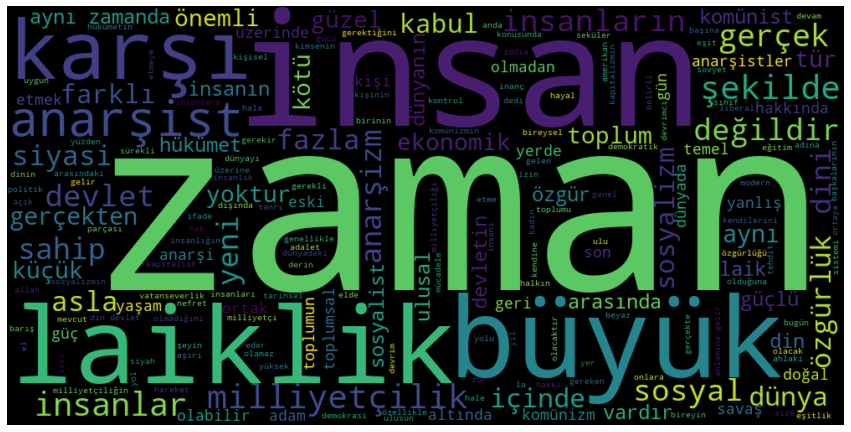

In [ ]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(df['text_final']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

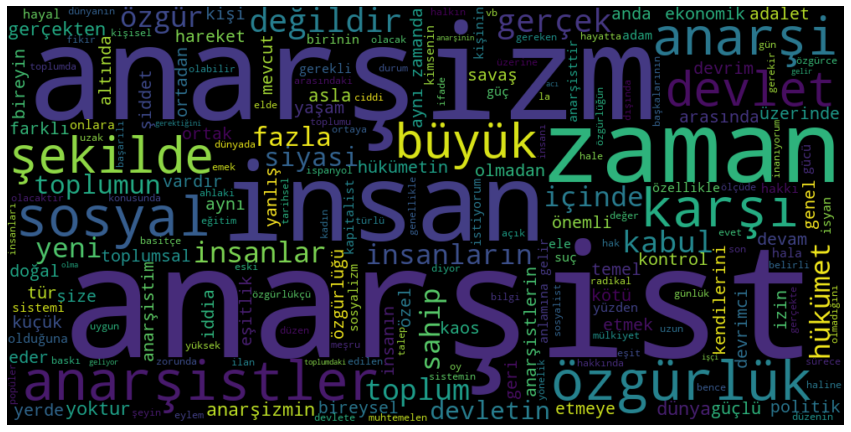

In [ ]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(df['text_final'].loc[df['ideology']==0]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

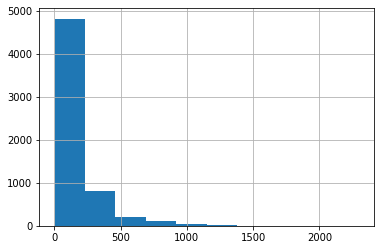

In [ ]:
df.describe()
df['text_final'].str.len().hist()

In [ ]:
#splitting datafame
X_train, X_test, y_train, y_test = train_test_split(df['text_final'], df['ideology'], random_state = 0)

In [ ]:
from sklearn.linear_model import SGDClassifier
trial2 = Pipeline([('vectorizer',CountVectorizer()), 
                   ('tfidf', TfidfTransformer()),
                   ('classifier', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])
trial2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                ('classifier',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
               

In [ ]:
predicted = trial2.predict(X_test)

In [ ]:
report = pd.DataFrame(classification_report(predicted, y_test, output_dict=True))
report = report.rename(columns={'0':'Anarşizm',
                                '1':'Komunizm',
                                '2':'Laisizm/Laiklik',
                                '3':'Milliyetçilik',
                                '4':'Muhafazakarlık',
                                '5':'Nötr'})
print("SVM RESULTS:")

SVM RESULTS:


In [ ]:
report

,Anarşizm,Komunizm,Laisizm/Laiklik,Milliyetçilik,Muhafazakarlık,Nötr,accuracy,macro avg,weighted avg
precision,0.710204,0.638554,0.861345,0.679842,0.548736,0.781513,0.698667,0.703366,0.710599
recall,0.701613,0.621094,0.807087,0.696356,0.748768,0.636986,0.698667,0.701984,0.698667
f1-score,0.705882,0.629703,0.833333,0.688000,0.633333,0.701887,0.698667,0.698690,0.700922
support,248.000000,256.000000,254.000000,247.000000,203.000000,292.000000,0.698667,1500.000000,1500.000000


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = Pipeline([('vectorizer',CountVectorizer()), 
                          ('tfidf', TfidfTransformer()),
                          ('classifier', MultinomialNB())])
nb_classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predicted2 = nb_classifier.predict(X_test)
report2 = pd.DataFrame(classification_report(predicted2, y_test, output_dict=True))
report2 = report2.rename(columns={'0':'Anarşizm',
                                  '1':'Komunizm',
                                  '2':'Laisizm/Laiklik',
                                  '3':'Milliyetçilik',
                                  '4':'Muhafazakarlık',
                                  '5':'Nötr'})
print("NB RESULTS:")

NB RESULTS:


In [ ]:
report2

,Anarşizm,Komunizm,Laisizm/Laiklik,Milliyetçilik,Muhafazakarlık,Nötr,accuracy,macro avg,weighted avg
precision,0.734694,0.626506,0.831933,0.683794,0.425993,0.525210,0.633333,0.638022,0.676691
recall,0.582524,0.559140,0.570605,0.650376,0.813793,0.811688,0.633333,0.664688,0.633333
f1-score,0.649819,0.590909,0.676923,0.666667,0.559242,0.637755,0.633333,0.630219,0.638125
support,309.000000,279.000000,347.000000,266.000000,145.000000,154.000000,0.633333,1500.000000,1500.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = Pipeline([('vectorizer',CountVectorizer()), 
                          ('tfidf', TfidfTransformer()),
                          ('classifier', DecisionTreeClassifier())])
tree_classifier.fit(X_train, y_train)

predicted3 = tree_classifier.predict(X_test)
report3 = pd.DataFrame(classification_report(predicted3, y_test, output_dict=True))
report3 = report3.rename(columns={'0':'Anarşizm',
                                  '1':'Komunizm',
                                  '2':'Laisizm/Laiklik',
                                  '3':'Milliyetçilik',
                                  '4':'Muhafazakarlık',
                                  '5':'Nötr'})
print("DC RESULTS:")

report3

DC RESULTS:


,Anarşizm,Komunizm,Laisizm/Laiklik,Milliyetçilik,Muhafazakarlık,Nötr,accuracy,macro avg,weighted avg
precision,0.563265,0.570281,0.815126,0.509881,0.815884,0.415966,0.618667,0.615067,0.667478
recall,0.666667,0.546154,0.769841,0.716667,0.477801,0.773438,0.618667,0.658428,0.618667
f1-score,0.610619,0.557957,0.791837,0.595843,0.602667,0.540984,0.618667,0.616651,0.621713
support,207.000000,260.000000,252.000000,180.000000,473.000000,128.000000,0.618667,1500.000000,1500.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = Pipeline([('vectorizer',CountVectorizer()), 
                          ('tfidf', TfidfTransformer()),
                          ('classifier', RandomForestClassifier())])
rf_classifier.fit(X_train, y_train)

predicted4 = rf_classifier.predict(X_test)
report4 = pd.DataFrame(classification_report(predicted4, y_test, output_dict=True))
report4 = report4.rename(columns={'0':'Anarşizm',
                                  '1':'Komunizm',
                                  '2':'Laisizm/Laiklik',
                                  '3':'Milliyetçilik',
                                  '4':'Muhafazakarlık',
                                  '5':'Nötr'})
print("RF RESULTS:")

report4

RF RESULTS:


,Anarşizm,Komunizm,Laisizm/Laiklik,Milliyetçilik,Muhafazakarlık,Nötr,accuracy,macro avg,weighted avg
precision,0.636735,0.489960,0.831933,0.596838,0.895307,0.361345,0.640667,0.635353,0.722999
recall,0.693333,0.693182,0.838983,0.743842,0.442857,0.860000,0.640667,0.712033,0.640667
f1-score,0.663830,0.574118,0.835443,0.662281,0.592593,0.508876,0.640667,0.639523,0.643169
support,225.000000,176.000000,236.000000,203.000000,560.000000,100.000000,0.640667,1500.000000,1500.000000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = Pipeline([('vectorizer',CountVectorizer()), 
                          ('tfidf', TfidfTransformer()),
                          ('classifier', GradientBoostingClassifier())])
gb_classifier.fit(X_train, y_train)

predicted5 = gb_classifier.predict(X_test)
report5 = pd.DataFrame(classification_report(predicted5, y_test, output_dict=True))
report5 = report5.rename(columns={'0':'Anarşizm',
                                  '1':'Komunizm',
                                  '2':'Laisizm/Laiklik',
                                  '3':'Milliyetçilik',
                                  '4':'Muhafazakarlık',
                                  '5':'Nötr'})
print("GB RESULTS:")

report5

GB RESULTS:


,Anarşizm,Komunizm,Laisizm/Laiklik,Milliyetçilik,Muhafazakarlık,Nötr,accuracy,macro avg,weighted avg
precision,0.624490,0.538153,0.794118,0.537549,0.332130,0.915966,0.614667,0.623734,0.711721
recall,0.801047,0.660099,0.935644,0.900662,0.582278,0.366387,0.614667,0.707686,0.614667
f1-score,0.701835,0.592920,0.859091,0.673267,0.422989,0.523409,0.614667,0.628919,0.605249
support,191.000000,203.000000,202.000000,151.000000,158.000000,595.000000,0.614667,1500.000000,1500.000000
